In [1]:
!pip install numpy pandas xgboost scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Load the data
data = pd.read_csv('EEGData_Condition4.csv')

# Features and labels
X = data[['AlphaPower', 'BetaPower']]
y = data['Label']
subjects = data['SubjectID']


In [9]:
# Initialize the Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Store accuracies for each subject
accuracies = []

# Perform cross-validation
for train_idx, test_idx in logo.split(X, y, groups=subjects):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Initialize XGBoost classifier
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = xgb_model.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Subject {int(subjects.iloc[test_idx].unique())} Accuracy: {accuracy * 100:.2f}%")
    
# Compute overall accuracy
overall_accuracy = np.mean(accuracies) * 100
print(f"\nOverall XGBoost Accuracy: {overall_accuracy:.2f}%")


c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\WERPELGA\AppData\Local\Temp\ipykernel_25420\3813099981.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Subject {int(subjects.iloc[test_idx].unique())} Accuracy: {accuracy * 100:.2f}%")
c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


Subject 1 Accuracy: 100.00%
Subject 2 Accuracy: 33.33%
Subject 3 Accuracy: 0.00%
Subject 4 Accuracy: 100.00%
Subject 5 Accuracy: 0.00%


C:\Users\WERPELGA\AppData\Local\Temp\ipykernel_25420\3813099981.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Subject {int(subjects.iloc[test_idx].unique())} Accuracy: {accuracy * 100:.2f}%")
c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\WERPELGA\AppData\Local\Temp\ipykernel_25420\3813099981.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation

Subject 6 Accuracy: 0.00%
Subject 7 Accuracy: 100.00%
Subject 8 Accuracy: 0.00%
Subject 9 Accuracy: 66.67%
Subject 10 Accuracy: 0.00%
Subject 11 Accuracy: 66.67%
Subject 12 Accuracy: 66.67%
Subject 13 Accuracy: 100.00%

Overall XGBoost Accuracy: 48.72%


c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\WERPELGA\AppData\Local\Temp\ipykernel_25420\3813099981.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Subject {int(subjects.iloc[test_idx].unique())} Accuracy: {accuracy * 100:.2f}%")
c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 


Feature: AlphaPower, Score: 0.58443
Feature: BetaPower, Score: 0.41557


c:\Users\WERPELGA\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


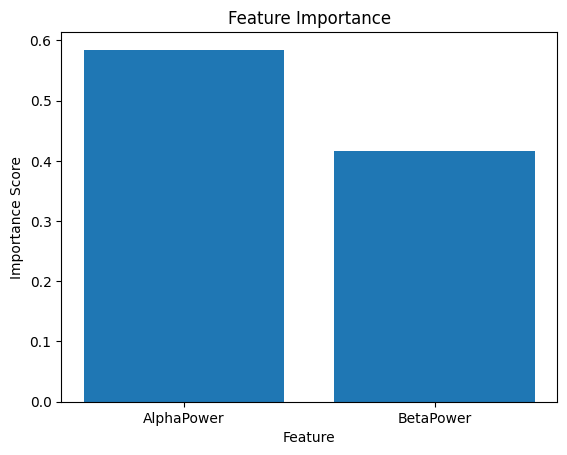

In [10]:
# Train model on the entire dataset
xgb_model_full = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model_full.fit(X, y)

# Get feature importances
importance = xgb_model_full.feature_importances_
feature_names = ['AlphaPower', 'BetaPower']
for i, v in enumerate(importance):
    print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

# Plot feature importance
plt.bar(feature_names, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()


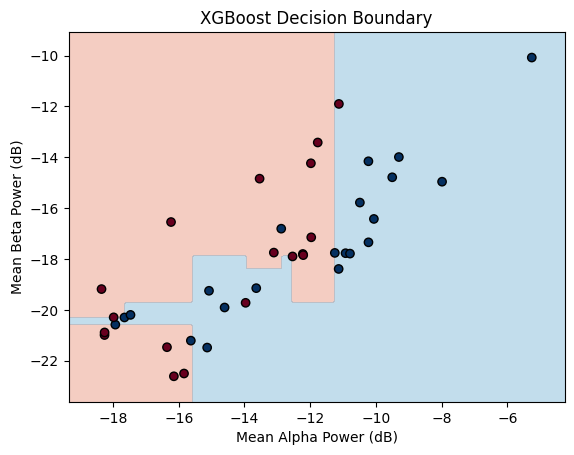

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mesh grid
x_min, x_max = X['AlphaPower'].min() - 1, X['AlphaPower'].max() + 1
y_min, y_max = X['BetaPower'].min() - 1, X['BetaPower'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class probabilities for each point in the mesh grid
Z = xgb_model_full.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.4, levels=np.linspace(0, 1, 3), cmap='RdBu')
plt.scatter(X['AlphaPower'], X['BetaPower'], c=y, cmap='RdBu', edgecolors='k')
plt.xlabel('Mean Alpha Power (dB)')
plt.ylabel('Mean Beta Power (dB)')
plt.title('XGBoost Decision Boundary')
plt.show()
